In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pathlib

In [3]:
stations_data_path = pathlib.Path("../dataset/STATION_DATA.CSV")
stations_df = pd.read_csv(stations_data_path, sep=";")

In [4]:
stations_df.head()

,REGIAO,UF,MUNICIPIO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
0,CO,DF,AGUAS EMENDADAS,A045,"-15,59638888","-47,62583332",1200
1,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54"
2,CO,DF,BRAZLANDIA,A042,"-15,59972221","-48,1311111",1143
3,CO,DF,GAMA (PONTE ALTA),A046,"-15,93527777","-48,13749999",990
4,CO,DF,PARANOA (COOPA-DF),A047,"-16,01111111","-47,5575",1043


In [5]:
stations_df.isna().sum()

REGIAO       0
UF           0
MUNICIPIO    0
CODIGO       0
LATITUDE     0
LONGITUDE    0
ALTITUDE     0
dtype: int64

In [6]:
stations_df.query("ALTITUDE == 'F'")

,REGIAO,UF,MUNICIPIO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
128,N,AM,CRMN MANAUS,S103,"-3,02249999","-60,05555555",F
129,N,AM,DTCEA TABATINGA,S105,"-4,25055555","-69,93499999",F
130,N,AM,DTCEA TEFE,S117,"-3,37722221","-64,72305554",F
141,N,AM,PEF ESTIRAO DO EQUADOR,S116,"-4,52999999","-71,61749999",F
142,N,AM,PEF IPIRANGA,S102,"-2,93055554","-69,69527777",F
143,N,AM,PEF YAUARETE,S115,",59944444","-69,19194444",F
146,N,AM,SANTA ISABEL DO RIO NEGRO,S121,"-,41444444","-65,01749999",F
161,N,PA,DOM ELISEU,S107,"-4,28999999","-47,55",F
162,N,PA,DTCEA JACAREACANGA,S120,"-6,23722221","-57,77499999",F
186,N,PA,ULIANOPOLIS,S111,"-3,8","-47,51",F


As colunas ALTITUDE, LATITUDE e LONGITUDE possuem valores com a vírgula indicando o separador de decimal, o que é ruim. Além disso, os dados faltando são representados por um 'F'. Vou trocá-los por None.

In [7]:
stations_df.ALTITUDE = stations_df.ALTITUDE.apply(lambda x: x.replace(',', '.'))
stations_df.LONGITUDE = stations_df.LONGITUDE.apply(lambda x: x.replace(',', '.'))
stations_df.LATITUDE = stations_df.LATITUDE.apply(lambda x: x.replace(',', '.'))
stations_df.ALTITUDE = stations_df.ALTITUDE.apply(lambda x: None if x == 'F' else x)
stations_df.ALTITUDE = pd.to_numeric(stations_df.ALTITUDE)
stations_df.LATITUDE = pd.to_numeric(stations_df.LATITUDE)
stations_df.LONGITUDE = pd.to_numeric(stations_df.LONGITUDE)

In [8]:
stations_df[stations_df.LATITUDE < -34]

,REGIAO,UF,MUNICIPIO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
603,SE,SP,CRIOSFERA,C891,-84.0,-79.494167,1285.0


Essa estação metereológica acima está na Antártica, apesar de mostrar que está na UF de SP. Uma rápida pesquisa mostra que 'Criosfera' é um módulo científico brasileiro na Antártica. 

In [9]:
stations_df.drop(603, inplace=True)

In [10]:
BBox = ((stations_df.LONGITUDE.min(), stations_df.LONGITUDE.max(),
         stations_df.LATITUDE.min(), stations_df.LATITUDE.max()))
BBox

(-72.78666666, -29.31666666, -33.74166666, 4.47749999)

In [11]:
background_img = plt.imread('assets/map_print.png')

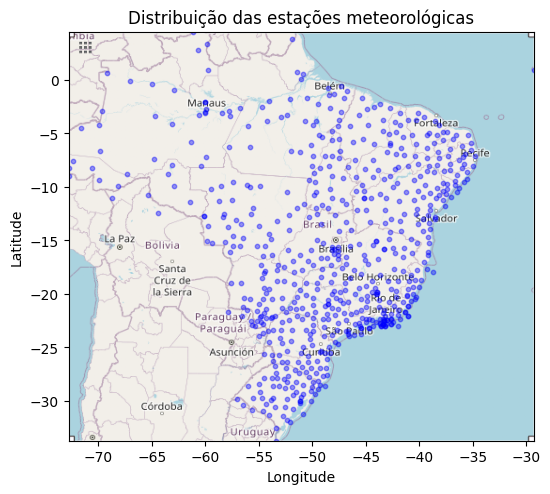

In [12]:
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(stations_df.LONGITUDE, stations_df.LATITUDE, zorder=1, alpha= 0.4, c='b', s=10)
ax.set_title('Distribuição das estações meteorológicas')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(background_img, zorder=0, extent = BBox, aspect= 'equal')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.savefig("./assets/distribuicao.png")
plt.show()

Acredito que os pontos acima plotados em outros países sejam devidos a pequenos erros de medida ou na hora de plotar o gráfico mesmo.

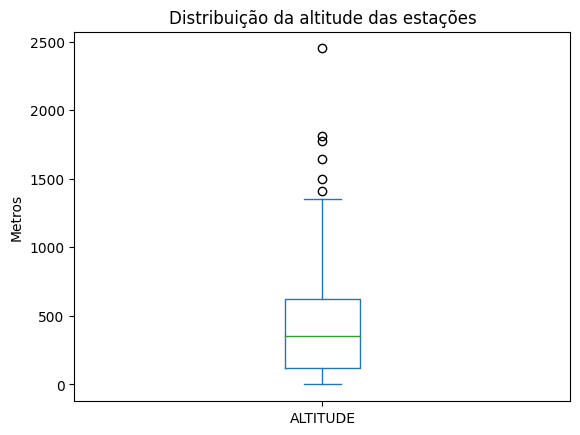

In [13]:
stations_df.ALTITUDE.plot.box()
plt.title("Distribuição da altitude das estações")
plt.ylabel("Metros")
plt.savefig("./assets/altitude_boxplot.png")

In [14]:
stations_df.query("ALTITUDE > 1400")

,REGIAO,UF,MUNICIPIO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
443,S,SC,BOM JARDIM DA SERRA - MORRO DA IGREJA,A845,-28.133333,-49.483333,1810.0
462,S,SC,SAO JOAQUIM,A815,-28.275556,-49.934444,1410.0
522,SE,MG,MONTE VERDE,A509,-22.861389,-46.043333,1500.0
561,SE,RJ,ITATIAIA,A635,-22.373889,-44.703056,2450.0
570,SE,RJ,PICO DO COUTO,A610,-22.481667,-43.291389,1777.0
601,SE,SP,CAMPOS DO JORDAO,A706,-22.750278,-45.603889,1642.0


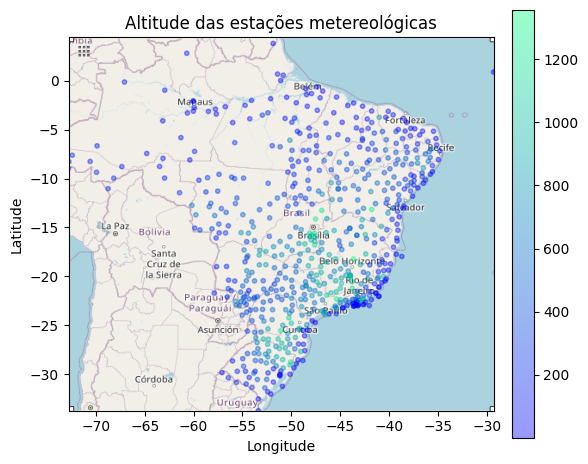

In [15]:
import matplotlib
fig, ax = plt.subplots(figsize = (6,6))
cm = matplotlib.colormaps['winter']
# cm = matplotlib.colormaps['Greens']
# cm = plt.cm.get_cmap('RdYlBu')
stations_filtered = stations_df[stations_df.ALTITUDE < 1400]
sm = ax.scatter(stations_filtered.LONGITUDE, 
                stations_filtered.LATITUDE, 
                zorder=1, alpha= 0.4, 
                c=stations_filtered.ALTITUDE, s=10, cmap=cm)
plt.colorbar(sm, fraction=0.046, pad=0.04)
ax.set_title('Altitude das estações metereológicas')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(background_img, zorder=0, extent = BBox, aspect= 'equal')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.savefig("./assets/alt_dist.png")
plt.show()

In [16]:
import seaborn as sns

In [17]:
stations_df.query("LATITUDE > 0")

,REGIAO,UF,MUNICIPIO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
143,N,AM,PEF YAUARETE,S115,0.599444,-69.191944,NaN
149,N,AP,ITAUBAL,A251,0.567778,-50.823611,21.0
150,N,AP,MACAPA,A249,0.035278,-51.088611,27.0
151,N,AP,OIAPOQUE,A242,3.813611,-51.862500,21.0
152,N,AP,PORTO GRANDE,A244,0.694444,-51.404167,84.0
195,N,RR,BALIZA,S113,0.947778,-59.746389,NaN
196,N,RR,BOA VISTA,A135,2.816944,-60.690833,94.0
197,N,RR,PACARAIMA,S114,4.477500,-61.149167,NaN
354,NE,RN,ARQ.SAO PEDRO E SAO PAULO,A302,0.900000,-29.316667,15.0
501,SE,MG,EB_PEF_BONFIM,S122,3.358889,-59.823889,NaN


Claramente as informações de REGIAO e UF da entrada 501 estão erradas, vou definir para os valores corretos.

In [18]:
stations_df.loc[501, 'REGIAO'] = 'N'
stations_df.loc[501, 'UF'] = 'RR'

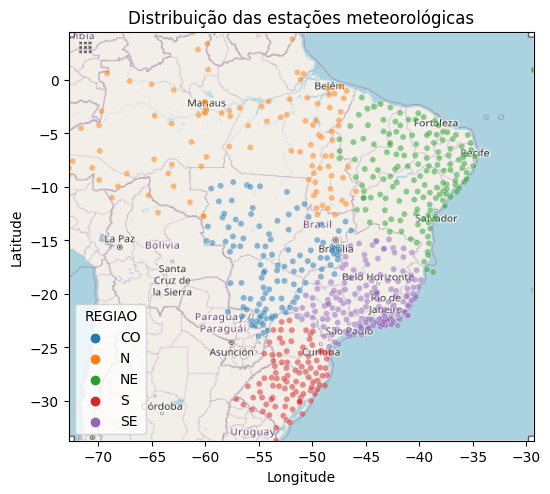

In [19]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(data=stations_df, x='LONGITUDE', y="LATITUDE", hue='REGIAO', ax=ax, alpha=0.5, s=20)
ax.set_title('Distribuição das estações meteorológicas')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(background_img, zorder=0, extent = BBox, aspect= 'equal')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.savefig("./assets/reg_dist.png")
plt.show()

# Estações presentes por ano

In [23]:
meds_per_year_path = pathlib.Path("../dataset/meds_per_year.csv")
meds_per_year_df = pd.read_csv(meds_per_year_path, header=None, delimiter=";", names=["qt", "year"])
meds_per_year_df.head()

,qt,year
0,5,2000
1,16,2001
2,27,2002
3,54,2003
4,54,2004


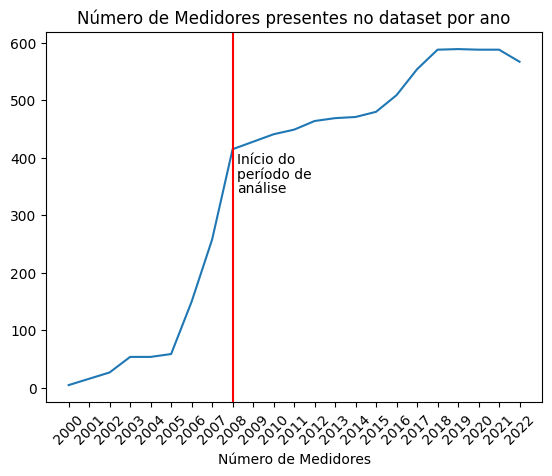

In [45]:
plt.plot(meds_per_year_df['year'], meds_per_year_df['qt'])
year_list = meds_per_year_df['year'].tolist() 
plt.xticks(year_list, year_list, rotation=45)
plt.axvline(2008, c='red')
plt.text(2008.2, 390, "Início do")
plt.text(2008.2, 365, "período de")
plt.text(2008.2, 340, "análise")
plt.xlabel("Ano")
plt.xlabel("Número de Medidores")
plt.title("Número de Medidores presentes no dataset por ano")
plt.savefig("assets/n_meds_per_year.png")
plt.show()

In [33]:
meds_per_year_df['year'].tolist()

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]